In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv(r'C:\Users\DELL\Desktop\intern\task 1\world_population_by_countries.csv')
df.head()

,index,Country,Population,Yearly % Change,Net Change,Density,Land Area,Migrants (net),Fert. Rate,Med. Age,Urb Pop (%),World Share (%)
0,1,China,"1,43,93,23,776",0.39,"55,40,090",153,"93,88,211","-3,48,399",1.7,38.0,61.0,18.47
1,2,India,"1,38,00,04,385",0.99,"1,35,86,631",464,"29,73,190","-5,32,687",2.2,28.0,35.0,17.70
2,3,United States,"33,10,02,651",0.59,"19,37,734",36,"91,47,420","9,54,806",1.8,38.0,83.0,4.25
3,4,Indonesia,"27,35,23,615",1.07,"28,98,047",151,"18,11,570","-98,955",2.3,30.0,56.0,3.51
4,5,Pakistan,"22,08,92,340",2.00,"43,27,022",287,"7,70,880","-2,33,379",3.6,23.0,35.0,2.83


In [3]:
# Remove commas from Population and convert to integers
df['Population'] = df['Population'].replace({',': ''}, regex=True).astype(int)

In [4]:
# Convert Med. Age to numeric and drop rows with missing values
df['Med. Age'] = pd.to_numeric(df['Med. Age'], errors='coerce')
df = df.dropna(subset=['Population', 'Med. Age'])

In [5]:
# Check the cleaned data
print(df.head())

   index        Country  Population  Yearly % Change   Net Change Density  \
0      1          China  1439323776             0.39    55,40,090     153   
1      2          India  1380004385             0.99  1,35,86,631     464   
2      3  United States   331002651             0.59    19,37,734      36   
3      4      Indonesia   273523615             1.07    28,98,047     151   
4      5       Pakistan   220892340             2.00    43,27,022     287   

   Land Area Migrants (net)  Fert. Rate  Med. Age  Urb Pop (%)  \
0  93,88,211      -3,48,399         1.7      38.0         61.0   
1  29,73,190      -5,32,687         2.2      28.0         35.0   
2  91,47,420       9,54,806         1.8      38.0         83.0   
3  18,11,570        -98,955         2.3      30.0         56.0   
4   7,70,880      -2,33,379         3.6      23.0         35.0   

   World Share (%)  
0            18.47  
1            17.70  
2             4.25  
3             3.51  
4             2.83  


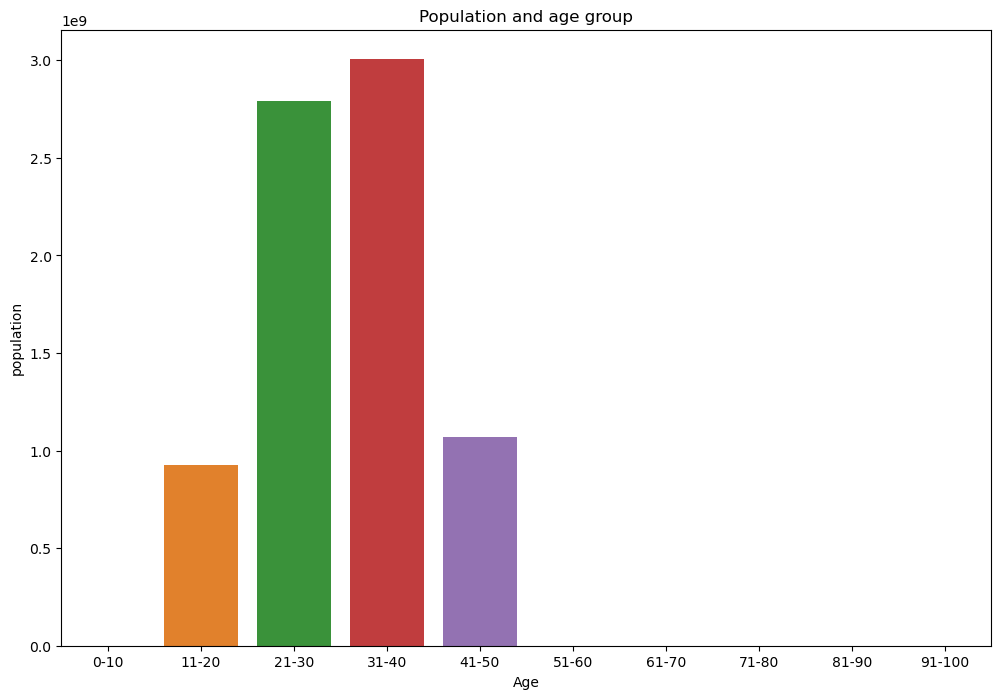

In [6]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
# Create a new column 'Age_Group' with age categories
df['Age_Group'] = pd.cut(df['Med. Age'], bins=bins, labels=labels, right=False)
# Group by 'Age_Group' and calculate the sum or mean of 'Population'
df_grouped = df.groupby('Age_Group', as_index=False)['Population'].sum()  

plt.figure(figsize=(12, 8))
sns.barplot(x='Age_Group', y='Population', data=df_grouped)

plt.xlabel('Age')
plt.ylabel('population')
plt.title('Population and age group')
plt.show()